##### Copyright 2020 The Cirq Developers

In [5]:
# Importing necessary libraries for analysing the dataset
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing dataset
airbnb_data = pd.read_csv('/content/drive/MyDrive/Datasets/listings.csv')
airbnb_data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,45305964,https://www.airbnb.com/rooms/45305964,20220921054954,2022-09-21,city scrape,Lumpini ville Nakhon in - River view studio Cozy,NaN,NaN,https://a0.muscache.com/pictures/693ac6ac-a193...,177103834,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
1,8975471,https://www.airbnb.com/rooms/8975471,20220921054954,2022-09-21,city scrape,[Monthly] Plum Condominium Paholyothin 89,ที่ของฉันใกล้กับสนามบิน ห้างสรรพสินค้า ที่พักข...,NaN,https://a0.muscache.com/pictures/e0bbd9d6-0c62...,46549310,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
2,31508092,https://www.airbnb.com/rooms/31508092,20220921054954,2022-09-21,city scrape,Room for rent good and cheap,NaN,NaN,https://a0.muscache.com/pictures/953dbcdc-233c...,223483764,...,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN
3,27934,https://www.airbnb.com/rooms/27934,20220921054954,2022-09-21,city scrape,Nice room with superb city view,Our cool and comfortable one bedroom apartment...,It is very center of Bangkok and easy access t...,https://a0.muscache.com/pictures/566374/23157b...,120437,...,4.91,4.66,4.75,NaN,f,2,2,0,0,0.51
4,27979,https://www.airbnb.com/rooms/27979,20220921054954,2022-09-21,city scrape,"Easy going landlord,easy place","<b>The space</b><br />""The village Condominium...",NaN,https://a0.muscache.com/pictures/106247594/1d6...,120541,...,NaN,NaN,NaN,NaN,f,2,1,1,0,NaN


In [4]:
#Understanding the data
# Checking the shape of datset
print(f'The shape of Airbnb Dataset is {airbnb_data.shape}')

The shape of Airbnb Dataset is (16640, 75)


In [5]:
# Checking the feature names
print(f' The names of the features present in the dataset are: ')
list(airbnb_data.columns)

 The names of the features present in the dataset are: 


['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'source',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30

In [6]:
#Checking for categorical columns
cat_cols = airbnb_data.select_dtypes(include = 'object').columns
print(f' The following are the categorical features in the dataset: {list(cat_cols)}')

 The following are the categorical features in the dataset: ['listing_url', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms_text', 'amenities', 'price', 'has_availability', 'calendar_last_scraped', 'first_review', 'last_review', 'instant_bookable']


In [7]:
# Checking for numeric/ non categorical columns
num_cols = airbnb_data.select_dtypes(exclude = 'object').columns
print(' The following are the non categorical features in the dataset:') 
list(num_cols)

 The following are the non categorical features in the dataset:


['id',
 'scrape_id',
 'host_id',
 'host_listings_count',
 'host_total_listings_count',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month']

In [8]:
# Checking first 5 rows of the data
airbnb_data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,45305964,https://www.airbnb.com/rooms/45305964,20220921054954,2022-09-21,city scrape,Lumpini ville Nakhon in - River view studio Cozy,NaN,NaN,https://a0.muscache.com/pictures/693ac6ac-a193...,177103834,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
1,8975471,https://www.airbnb.com/rooms/8975471,20220921054954,2022-09-21,city scrape,[Monthly] Plum Condominium Paholyothin 89,ที่ของฉันใกล้กับสนามบิน ห้างสรรพสินค้า ที่พักข...,NaN,https://a0.muscache.com/pictures/e0bbd9d6-0c62...,46549310,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
2,31508092,https://www.airbnb.com/rooms/31508092,20220921054954,2022-09-21,city scrape,Room for rent good and cheap,NaN,NaN,https://a0.muscache.com/pictures/953dbcdc-233c...,223483764,...,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN
3,27934,https://www.airbnb.com/rooms/27934,20220921054954,2022-09-21,city scrape,Nice room with superb city view,Our cool and comfortable one bedroom apartment...,It is very center of Bangkok and easy access t...,https://a0.muscache.com/pictures/566374/23157b...,120437,...,4.91,4.66,4.75,NaN,f,2,2,0,0,0.51
4,27979,https://www.airbnb.com/rooms/27979,20220921054954,2022-09-21,city scrape,"Easy going landlord,easy place","<b>The space</b><br />""The village Condominium...",NaN,https://a0.muscache.com/pictures/106247594/1d6...,120541,...,NaN,NaN,NaN,NaN,f,2,1,1,0,NaN


In [9]:
# Checking the last 5 rows of the data
airbnb_data.tail(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
16635,39158519,https://www.airbnb.com/rooms/39158519,20220921054954,2022-09-21,city scrape,"Impact Apartment, near IMPACT Challenger","Studio apartment in Muangthong Thani,only 500 ...",Near <br />Impact arena 0.5 Km.<br />Challeng...,https://a0.muscache.com/pictures/fb57dffa-0f1a...,260144775,...,NaN,NaN,NaN,NaN,t,10,10,0,0,NaN
16636,30163025,https://www.airbnb.com/rooms/30163025,20220921054954,2022-09-21,city scrape,Netipon residence,ห้องพักของเราเป็นห้องพัก 1 ห้องนอน ที่มีห้องนั...,คุณจะพบกับย่านอาหารทั้งข้างถนน (Street food) แ...,https://a0.muscache.com/pictures/ec36af7e-fd17...,44921338,...,NaN,NaN,NaN,NaN,t,1,1,0,0,0.02
16637,14997576,https://www.airbnb.com/rooms/14997576,20220921054954,2022-09-21,city scrape,One Bedroom Condo Close to the City and Facili...,My Place is close to a lot of great Facilities...,NaN,https://a0.muscache.com/pictures/39f9a91c-a61e...,94577344,...,NaN,NaN,NaN,NaN,t,2,1,1,0,NaN
16638,7623057,https://www.airbnb.com/rooms/7623057,20220921054954,2022-09-21,city scrape,Affordable 1BedRoom Condo close2BTS,"Clean and cozy room including TV, wifi, microw...","- Hospitals : Sikarin Hospital, Piyamin Hospit...",https://a0.muscache.com/pictures/103075498/7ed...,33550104,...,4.95,4.38,4.84,NaN,t,7,6,0,0,0.91
16639,27847801,https://www.airbnb.com/rooms/27847801,20220921054954,2022-09-21,city scrape,Comfy & Clean 1 Bedroom with Pool View at The ...,Located right at the edge of Northern Bangkok...,Great Location: <br />- 5 mins to IMPACT Exhi...,https://a0.muscache.com/pictures/088010b4-cba4...,210308325,...,5.00,4.56,4.67,NaN,t,1,1,0,0,0.18


In [10]:
# Checking the information of the dataset
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16640 entries, 0 to 16639
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            16640 non-null  int64  
 1   listing_url                                   16640 non-null  object 
 2   scrape_id                                     16640 non-null  int64  
 3   last_scraped                                  16640 non-null  object 
 4   source                                        16640 non-null  object 
 5   name                                          16631 non-null  object 
 6   description                                   15840 non-null  object 
 7   neighborhood_overview                         8956 non-null   object 
 8   picture_url                                   16640 non-null  object 
 9   host_id                                       16640 non-null 

In [11]:
# Checking for the null values
print(f'The missing values before cleaning the data are:')
airbnb_data.isnull().sum()

The missing values before cleaning the data are:


id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               6573
Length: 75, dtype: int64

In [12]:
# Filling missing values
airbnb_data['name'].fillna('Absent', inplace = True)
airbnb_data['host_name'].fillna('Absent', inplace =  True)

In [13]:
# Dropping the unncessary columns.
airbnb_data_new = airbnb_data.drop(['last_review','reviews_per_month'], axis =1)
airbnb_data_new.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,45305964,https://www.airbnb.com/rooms/45305964,20220921054954,2022-09-21,city scrape,Lumpini ville Nakhon in - River view studio Cozy,NaN,NaN,https://a0.muscache.com/pictures/693ac6ac-a193...,177103834,...,NaN,NaN,NaN,NaN,NaN,t,1,1,0,0
1,8975471,https://www.airbnb.com/rooms/8975471,20220921054954,2022-09-21,city scrape,[Monthly] Plum Condominium Paholyothin 89,ที่ของฉันใกล้กับสนามบิน ห้างสรรพสินค้า ที่พักข...,NaN,https://a0.muscache.com/pictures/e0bbd9d6-0c62...,46549310,...,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0
2,31508092,https://www.airbnb.com/rooms/31508092,20220921054954,2022-09-21,city scrape,Room for rent good and cheap,NaN,NaN,https://a0.muscache.com/pictures/953dbcdc-233c...,223483764,...,NaN,NaN,NaN,NaN,NaN,t,1,0,1,0
3,27934,https://www.airbnb.com/rooms/27934,20220921054954,2022-09-21,city scrape,Nice room with superb city view,Our cool and comfortable one bedroom apartment...,It is very center of Bangkok and easy access t...,https://a0.muscache.com/pictures/566374/23157b...,120437,...,4.97,4.91,4.66,4.75,NaN,f,2,2,0,0
4,27979,https://www.airbnb.com/rooms/27979,20220921054954,2022-09-21,city scrape,"Easy going landlord,easy place","<b>The space</b><br />""The village Condominium...",NaN,https://a0.muscache.com/pictures/106247594/1d6...,120541,...,NaN,NaN,NaN,NaN,NaN,f,2,1,1,0


In [14]:
# Checking for null values in the new dataset
print(f'The number of missing values after cleaning the data are:')
airbnb_data_new.isnull().sum()

The number of missing values after cleaning the data are:


id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
instant_bookable                                0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
Length: 73, dtype: int64

[Text(0, 0, 'Curry'),
 Text(1, 0, 'Noons'),
 Text(2, 0, 'K'),
 Text(3, 0, 'Pornchai'),
 Text(4, 0, 'Gravity'),
 Text(5, 0, 'Bee'),
 Text(6, 0, 'Alex'),
 Text(7, 0, 'Dusadee'),
 Text(8, 0, 'Zuzu'),
 Text(9, 0, 'George')]

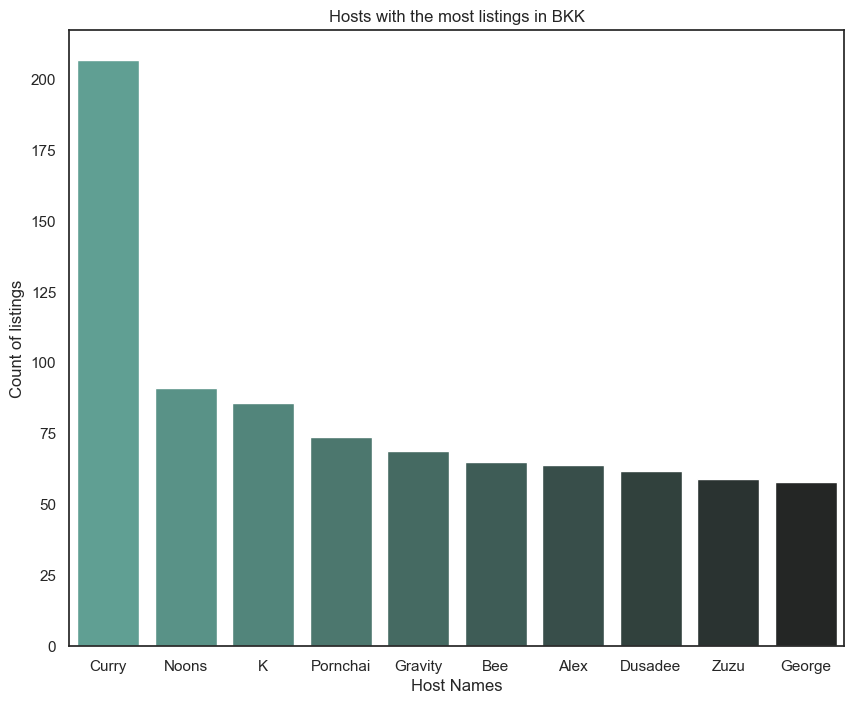

In [7]:
# Visualizing the hosts with most listings.
sns.set(rc={'figure.figsize': (10, 8)})
sns.set_style('white')
path = '/Users/PC/Desktop/Deadline/'
airbnb = pd.read_csv(path + 'listings.csv')

top_host = airbnb.host_name.value_counts().head(10)
top_host_df = pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index': 'host_name',
                   'host_name': 'P_Count'}, inplace=True)
top_host_df
viz_1 = sns.barplot(x="host_name", y="P_Count",
                    data=top_host_df, palette='dark:#5A9_r')
viz_1.set_title('Hosts with the most listings in BKK')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host Names')
viz_1.set_xticklabels(viz_1.get_xticklabels())


In [22]:
# Number of Airbnb listed in each neighbourhood
data =airbnb_data_new.groupby(['neighbourhood_cleansed'])['id'].count().reset_index().rename(columns = {'id':'count'}).sort_values(by='count', ascending = False)
data.head()

,neighbourhood_cleansed,count
22,Khlong Toei,2101
47,Vadhana,2093
37,Ratchathewi,1082
18,Huai Khwang,1079
8,Bang Rak,835


In [23]:
# Let's see who has the most listings and in which neighbourhood.
host_areas = airbnb_data_new.groupby(['host_name','neighbourhood_cleansed'])['calculated_host_listings_count'].max().reset_index()
top_hosts = host_areas.sort_values(by = ['calculated_host_listings_count'], ascending = False).head(9)
top_hosts

,host_name,neighbourhood_cleansed,calculated_host_listings_count
1321,Curry,Vadhana,207
1320,Curry,Thung khru,207
1319,Curry,Sathon,207
1318,Curry,Ratchathewi,207
1317,Curry,Phra Khanong,207
1316,Curry,Khlong Toei,207
1315,Curry,Huai Khwang,207
1314,Curry,Bang Rak,207
4276,Noons,Sathon,91


In [30]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

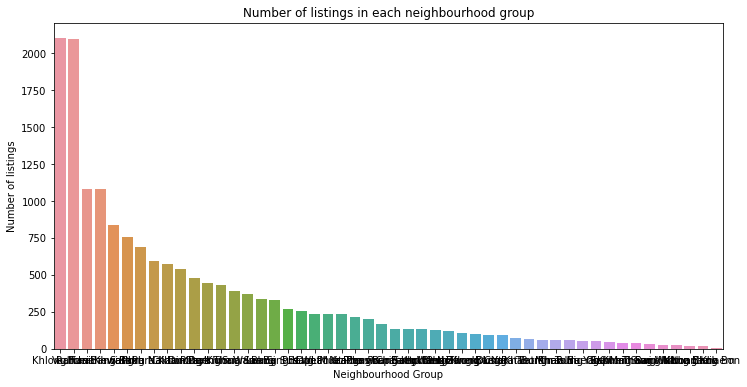

In [31]:
# Visualizing the number of listings in each neighbourhood through bar plot
plt.rcParams['figure.figsize'] = (12,6)
ax = sns.barplot(x = data['neighbourhood_cleansed'], y = data['count'], data = data)
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Number of listings')
ax.set_title('Number of listings in each neighbourhood group')
plt.show()

# Notebook template

In [35]:
# Checking the descriptive statistics
airbnb_data_new.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
count,1.664000e+04,1.664000e+04,1.664000e+04,16640.000000,16640.000000,0.0,16640.000000,16640.000000,16640.000000,0.0,...,9878.000000,9875.000000,9878.000000,9873.000000,9873.000000,0.0,16640.000000,16640.000000,16640.000000,16640.000000
mean,8.753380e+16,2.022092e+13,1.484973e+08,15.456911,23.888041,NaN,13.746697,100.561649,3.058293,NaN,...,4.665458,4.746525,4.755901,4.593809,4.637544,NaN,12.237500,8.680709,2.436899,0.467849
std,2.225392e+17,0.000000e+00,1.218480e+08,35.866749,58.970962,NaN,0.050285,0.054060,2.107078,NaN,...,0.555549,0.532553,0.530169,0.551433,0.555376,NaN,26.503542,25.823901,5.587304,4.006462
min,2.793400e+04,2.022092e+13,5.892000e+04,0.000000,0.000000,NaN,13.527300,100.311700,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000
25%,2.002339e+07,2.022092e+13,4.049175e+07,1.000000,2.000000,NaN,13.718508,100.530158,2.000000,NaN,...,4.580000,4.730000,4.750000,4.470000,4.560000,NaN,1.000000,0.000000,0.000000,0.000000
50%,3.324110e+07,2.022092e+13,1.229586e+08,4.000000,6.000000,NaN,13.738270,100.561710,2.000000,NaN,...,4.830000,4.920000,4.940000,4.750000,4.780000,NaN,4.000000,1.000000,0.000000,0.000000
75%,4.278576e+07,2.022092e+13,2.314076e+08,13.000000,18.000000,NaN,13.761935,100.587710,4.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,5.000000,NaN,11.000000,5.000000,2.000000,0.000000
max,7.198605e+17,2.022092e+13,4.801477e+08,395.000000,1173.000000,NaN,13.973550,100.923440,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,5.000000,NaN,207.000000,207.000000,40.000000,62.000000


In [36]:
# Checking for outliers
airbnb_data_new.agg({'price':['mean','median','max','count']})

,price
max,$999.00
count,16640


In [26]:
# Finding which neighbourhood has got maximum number of reviews. 
areas_reviews = airbnb_data_new.groupby(['neighbourhood_cleansed'])['number_of_reviews'].max().reset_index().sort_values(by = 'number_of_reviews', ascending = False)
areas_reviews

,neighbourhood_cleansed,number_of_reviews
31,Phaya Thai,1151
24,Lat Krabang,722
23,Lak Si,528
22,Khlong Toei,484
41,Sathon,461
16,Don Mueang,449
47,Vadhana,379
34,Pom Prap Sattru Phai,377
8,Bang Rak,371
35,Pra Wet,363


<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://quantumai.google/cirq/tutorials/google/colab"><img src="https://quantumai.google/site-assets/images/buttons/quantumai_logo_1x.png" />View on QuantumAI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/quantumlib/Cirq/blob/master/docs/tutorials/google/colab.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/colab_logo_1x.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/quantumlib/Cirq/blob/master/docs/tutorials/google/colab.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/github_logo_1x.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/Cirq/docs/tutorials/google/colab.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/download_icon_1x.png" />Download notebook</a>
  </td>
</table>

In [43]:
#Busiest hosts would be those who have maximum number of reviews as people are booking frequently at those hosts.
busiest_hosts = airbnb_data_new.groupby(['host_name','host_id','room_type','neighbourhood_cleansed'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busiest_hosts

,host_name,host_id,room_type,neighbourhood_cleansed,number_of_reviews
7057,Suchada,116193397,Entire home/apt,Phaya Thai,1151
5016,Pailin,158545122,Private room,Lat Krabang,722
8549,Wuthiphon,35462876,Entire home/apt,Lak Si,528
7755,Themustang,30963587,Hotel room,Khlong Toei,484
776,Bee,3346331,Entire home/apt,Sathon,461
656,Auttapon,48491149,Private room,Don Mueang,449
1780,Evan,1927968,Entire home/apt,Sathon,426
145,Alex,19266319,Entire home/apt,Vadhana,379
971,Bua,2389272,Private room,Pom Prap Sattru Phai,377
3712,Mam,15218917,Entire home/apt,Bang Rak,371


<BarContainer object of 10 artists>

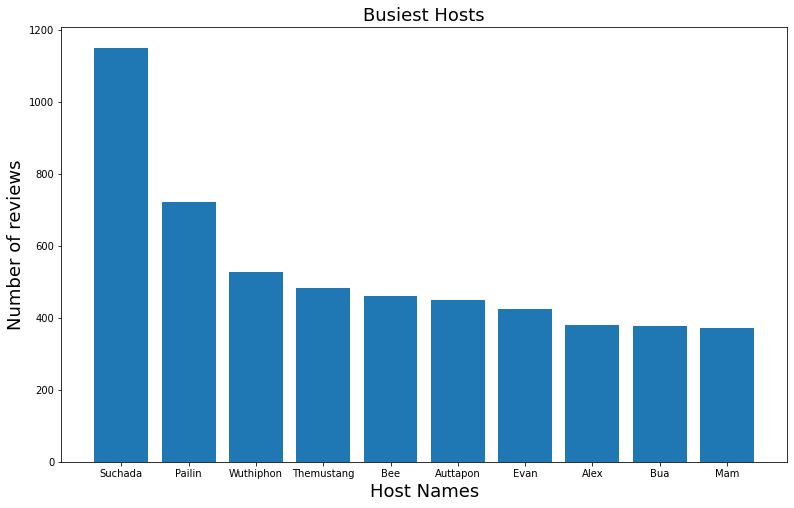

In [44]:
# Visualising the busiest hosts data through bar plot.
host_name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']
plt.title('Busiest Hosts', {'fontsize':18})
plt.xlabel('Host Names',{'fontsize':18})
plt.ylabel('Number of reviews',{'fontsize':18})
plt.bar(host_name, reviews)

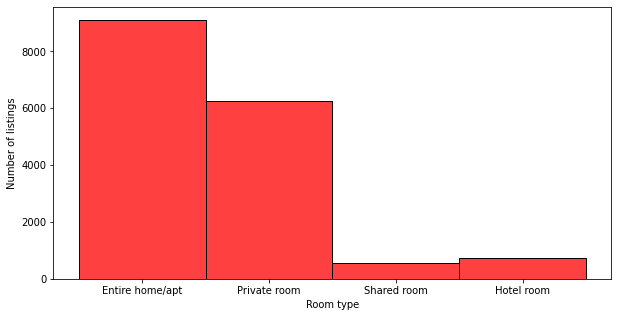

In [45]:
# Plotting histogram for room types to look for which are most preferred room types.
plt.rcParams['figure.figsize'] = (10,5)
hp = sns.histplot(airbnb_data_new['room_type'], color= 'red')
hp.set_xlabel('Room type') 
hp.set_ylabel('Number of listings')
plt.show()

In [ ]:
# Top 5 Busiest Hosts are:
# Suchada
# Pailin
# Wuthiphon
# Themustang
# Bee

## Setup
Note: this notebook relies on unreleased Cirq features. If you want to try these features, make sure you install cirq via `pip install cirq --pre`.

In [ ]:
try:
    import cirq
    import cirq_google
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq-google --pre
    print("installed cirq.")
    import cirq
    import cirq_google

In [47]:
# Lets find the top 10 neighbourhoods with most listings
df1 = airbnb_data_new.groupby(['neighbourhood_cleansed'])['id'].count().nlargest(10)
df1

neighbourhood_cleansed
Khlong Toei     2101
Vadhana         2093
Ratchathewi     1082
Huai Khwang     1079
Bang Rak         835
Sathon           754
Bang Na          686
Phra Nakhon      592
Phra Khanong     575
Chatu Chak       541
Name: id, dtype: int64

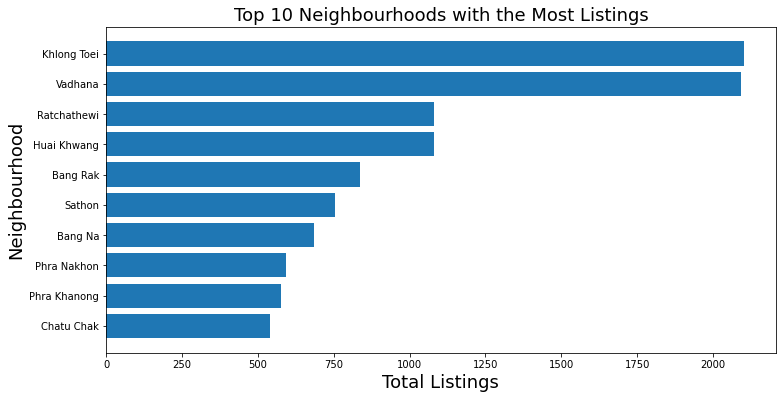

In [48]:
# Visualizing the top 10 neighbourhood listings through bar plot
plt.figure(figsize=(12,6))
x = list(df1.index)
y = list(df1.values)
x.reverse()
y.reverse()

plt.title("Top 10 Neighbourhoods with the Most Listings", {'fontsize':18})
plt.ylabel("Neighbourhood", {'fontsize':18})
plt.xlabel("Total Listings", {'fontsize':18})

plt.barh(x, y)
plt.show()

In [50]:
airbnb_data_new.groupby(['neighbourhood_cleansed','room_type'])['number_of_reviews'].max().reset_index().sort_values(by = 'number_of_reviews', ascending = False).head(10)

,neighbourhood_cleansed,room_type,number_of_reviews
105,Phaya Thai,Entire home/apt,1151
85,Lat Krabang,Private room,722
79,Lak Si,Entire home/apt,528
76,Khlong Toei,Hotel room,484
141,Sathon,Entire home/apt,461
58,Don Mueang,Private room,449
160,Vadhana,Entire home/apt,379
119,Pom Prap Sattru Phai,Private room,377
27,Bang Rak,Entire home/apt,371
121,Pra Wet,Entire home/apt,363


## Make a copy of this template

You will need to have access to Quantum Computing Service before running this colab.

This notebook can serve as a starter kit for you to run programs on Google's quantum hardware.  You can download it using the directions below, open it in colab (or Jupyter), and modify it to begin your experiments.

## How to download iPython notebooks from GitHub

You can retrieve iPython notebooks in the Cirq repository by
going to the [docs/ directory](https://github.com/quantumlib/Cirq/tree/master/docs).  For instance, this Colab template is found [here](https://github.com/quantumlib/Cirq/blob/master/docs/tutorials/google/colab.ipynb). Select the file that you would like to download and then click the *Raw* button in the upper-right part of the window:

<img src="https://raw.githubusercontent.com/quantumlib/Cirq/master/docs/images/colab_github.png" alt="GitHub UI button to view raw file">

This will show the entire file contents.  Right-click and select *Save as* to save this file to your computer.  Make sure to save to a file with a `.ipynb` extension (you may need to select *All files* from the format dropdown instead of *text*). You can also get to this Colab's [raw content directly](https://raw.githubusercontent.com/quantumlib/Cirq/master/docs/tutorials/google/colab.ipynb)

You can also retrieve the entire Cirq repository by running the following command in a terminal that has `git` installed:

```
git checkout https://github.com/quantumlib/Cirq.git
```

## How to open Google Colab

You can open a new Colab notebook from your Google Drive window or by visiting the [Colab site](https://colab.research.google.com/notebooks/intro.ipynb).  From the Colaboratory site, you can use the menu to upload an iPython notebook:

<img src="https://raw.githubusercontent.com/quantumlib/Cirq/master/docs/images/colab_upload.png" alt="Google Colab's upload notebook entry in File menu.">

This will upload the ipynb file that you downloaded before.  You can now run all the commands, modify it to suit your goals, and share it with others.

### More Documentation Links

* [Quantum Engine concepts](/cirq/google/concepts.md)
* [Quantum Engine documentation](/cirq/google/engine.md)
* [Cirq documentation](https://quantumai.google/cirq)
* [Colab documentation](https://colab.research.google.com/notebooks/welcome.ipynb)


## Authenticate with Quantum Computing Service and install Cirq

For details of authentication and installation, please see [Get started with Quantum Computing Service](start.ipynb).

Note:  The below code will install the latest stable release of Cirq.  If you need the latest and greatest features and don't mind if a few things aren't quite working correctly, you can install the pre-release version of `cirq` using `pip install --pre cirq` instead of `pip install cirq` to get the most up-to-date features of Cirq.

1. Enter the Cloud project ID you'd like to use in the `project_id` field.
2. Then run the cell below (and go through the auth flow for access to the project id you entered).

<img src="https://raw.githubusercontent.com/quantumlib/Cirq/master/docs/images/run-code-block.png" alt="Quantum Engine console">

In [ ]:
# The Google Cloud Project id to use.
project_id = '' #@param {type:"string"}
processor_id = "" #@param {type:"string"}

from cirq_google.engine.qcs_notebook import get_qcs_objects_for_notebook
# For real engine instances, delete 'virtual=True' below.
qcs_objects = get_qcs_objects_for_notebook(project_id, processor_id, virtual=True)
engine = qcs_objects.engine
processor_id = qcs_objects.processor_id

## Create an Engine variable

The following creates an engine variable which can be used to run programs under the project ID you entered above.

In [ ]:
from google.auth.exceptions import DefaultCredentialsError
from google.api_core.exceptions import PermissionDenied

# Create an Engine object to use, providing the project id and the args
try: 
    if qcs_objects.signed_in: # This line only needed for colab testing.
        engine = cirq_google.get_engine()
    print(f"Successful authentication using project {project_id}!")
    print('Available Processors: ')
    print(engine.list_processors())
    print(f'Using processor: {processor_id}')
    processor = engine.get_processor(processor_id)
except DefaultCredentialsError as err: 
    print("Could not authenticate to Google Quantum Computing Service.")
    print(" Tips: If you are using Colab: make sure the previous cell was executed successfully.")
    print("       If this notebook is not in Colab (e.g. Jupyter notebook), make sure gcloud is installed and `gcloud auth application-default login` was executed.")
    print()
    print("Error message:")
    print(err)
except PermissionDenied as err:
    print(f"While you are authenticated to Google Cloud it seems the project '{project_id}' does not exist or does not have the Quantum Engine API enabled.")
    print("Error message:")
    print(err)

## Example

In [ ]:
# A simple example.
q = cirq.GridQubit(5, 2)
circuit = cirq.Circuit(cirq.X(q)**0.5, cirq.measure(q, key='m'))

job = processor.run_sweep(
    program=circuit,
    repetitions=1000)

results = [str(int(b)) for b in job.results()[0].measurements['m'][:, 0]]
print('Success!  Results:')
print(''.join(results))